# Feature Information
<table style='margin-left: auto; margin-right: auto'>
    <tr>
        <th colspan='3'> Cleaned DOHMH Dog Bite Data </th>
    <tr>
    <tr>
        <th> Column Name </th>
        <th> Description </th>
        <th> Data Type </th>
    </tr>
    <tr>
        <td> spay_neuter </th>
        <td> Surgical removal of dog's reproductive organs. True (reported to DOHMH as Spayed or Neutered), False (Unknown or Not Spayed or Neutered) </th>
        <td> Boolean </th>
    </tr>
    <tr>
        <td> borough </th>
        <td> Dog bite Borough. </th>
        <td> Text </th>
    </tr>
    <tr>
        <td> year </th>
        <td> Reported on a specific year </th>
        <td> Integer </th>
    </tr>
    <tr>
        <td> month </th>
        <td> Reported on a specific month </th>
        <td> Integer </th>
    </tr>
    <tr>
        <td> day_of_week </th>
        <td> Reported on a specific Day of Week </th>
        <td> Integer </th>
    </tr>
    <tr>
        <td> mixed/other </th>
        <td> Indicates that the dog was a mixed or other breed. Multiple True values indicate mixed dog breed. </th>
        <td> Boolean </th>
    </tr>
    <tr>
        <td> pit_bull </th>
        <td> Indicates that the dog was a pit bull. Multiple True values indicate mixed dog breed. </th>
        <td> Boolean </th>
    </tr>
    <tr>
        <td> shih_tzu </th>
        <td> Indicates that the dog was a shih tzu. Multiple True values indicate mixed dog breed. </th>
        <td> Boolean </th>
    </tr>
    <tr>
        <td> chihuahua </th>
        <td> Indicates that the dog was a chihuahua. Multiple True values indicate mixed dog breed. </th>
        <td> Boolean </th>
    </tr>
    <tr>
        <td> german_shepherd </th>
        <td> Indicates that the dog was a german shepherd. Multiple True values indicate mixed dog breed. </th>
        <td> Boolean </th>
    </tr>
</table>

# Import

In [1]:
# libraries and modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import MinMaxScaler


In [2]:
# check for non-numeric values in zip_code
def is_numeric(x):
    try:
        float(x)
    except:
        return False
    return True

In [3]:
# import data
preprocessed = pd.read_csv('../data/processed/dog_bite_preprocessed.csv')

# display
preprocessed.head()

,spay_neuter,borough,year,month,day_of_week,latitude,longitude,mixed/other,pit_bull,shih_tzu,chihuahua,german_shepherd,yorkshire_terrier
0,False,brooklyn,2018,1,0,40.641026,-74.016688,True,False,False,False,False,False
1,False,brooklyn,2018,1,5,40.577372,-73.988706,False,True,False,False,False,False
2,False,brooklyn,2018,1,0,40.677916,-74.005154,True,False,False,False,False,False
3,False,brooklyn,2018,1,1,40.577372,-73.988706,False,True,False,False,False,False
4,False,brooklyn,2018,1,2,40.677916,-74.005154,True,False,False,False,False,False


# Wrangling
Borough is not needed in clustering, only EDA

In [4]:
# drop borough
wrangled = preprocessed.drop(columns=['borough'], axis=1)

wrangled.head()

,spay_neuter,year,month,day_of_week,latitude,longitude,mixed/other,pit_bull,shih_tzu,chihuahua,german_shepherd,yorkshire_terrier
0,False,2018,1,0,40.641026,-74.016688,True,False,False,False,False,False
1,False,2018,1,5,40.577372,-73.988706,False,True,False,False,False,False
2,False,2018,1,0,40.677916,-74.005154,True,False,False,False,False,False
3,False,2018,1,1,40.577372,-73.988706,False,True,False,False,False,False
4,False,2018,1,2,40.677916,-74.005154,True,False,False,False,False,False


In [6]:
# normalize latitude and longitude using min-max scaling
scaler = MinMaxScaler()
wrangled[['latitude', 'longitude']] = scaler.fit_transform(wrangled[['latitude', 'longitude']])

# display
wrangled.head()

,spay_neuter,year,month,day_of_week,latitude,longitude,mixed/other,pit_bull,shih_tzu,chihuahua,german_shepherd,yorkshire_terrier
0,False,2018,1,0,0.059052,0.852797,True,False,False,False,False,False
1,False,2018,1,5,0.030848,0.855556,False,True,False,False,False,False
2,False,2018,1,0,0.075398,0.853935,True,False,False,False,False,False
3,False,2018,1,1,0.030848,0.855556,False,True,False,False,False,False
4,False,2018,1,2,0.075398,0.853935,True,False,False,False,False,False


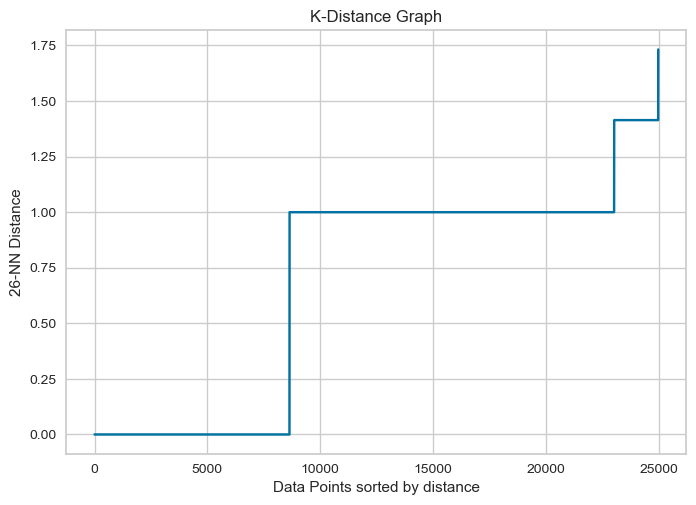

In [ ]:
minPts = 2 * data_minimized.shape[1]

neigh = NearestNeighbors(n_neighbors=minPts)
neigh.fit(data_minimized)
distances, indices = neigh.kneighbors(data_minimized)

# Sort the distances to the nearest `minPts` neighbors
distances = np.sort(distances[:, minPts - 1])
plt.plot(distances)
plt.xlabel('Data Points sorted by distance')
plt.ylabel(f'{minPts}-NN Distance')
plt.title('K-Distance Graph')
# plt.xlim(24980, 24985)
plt.show()

c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with featu

ValueError: x and y must have same first dimension, but have shapes (18,) and (10,)

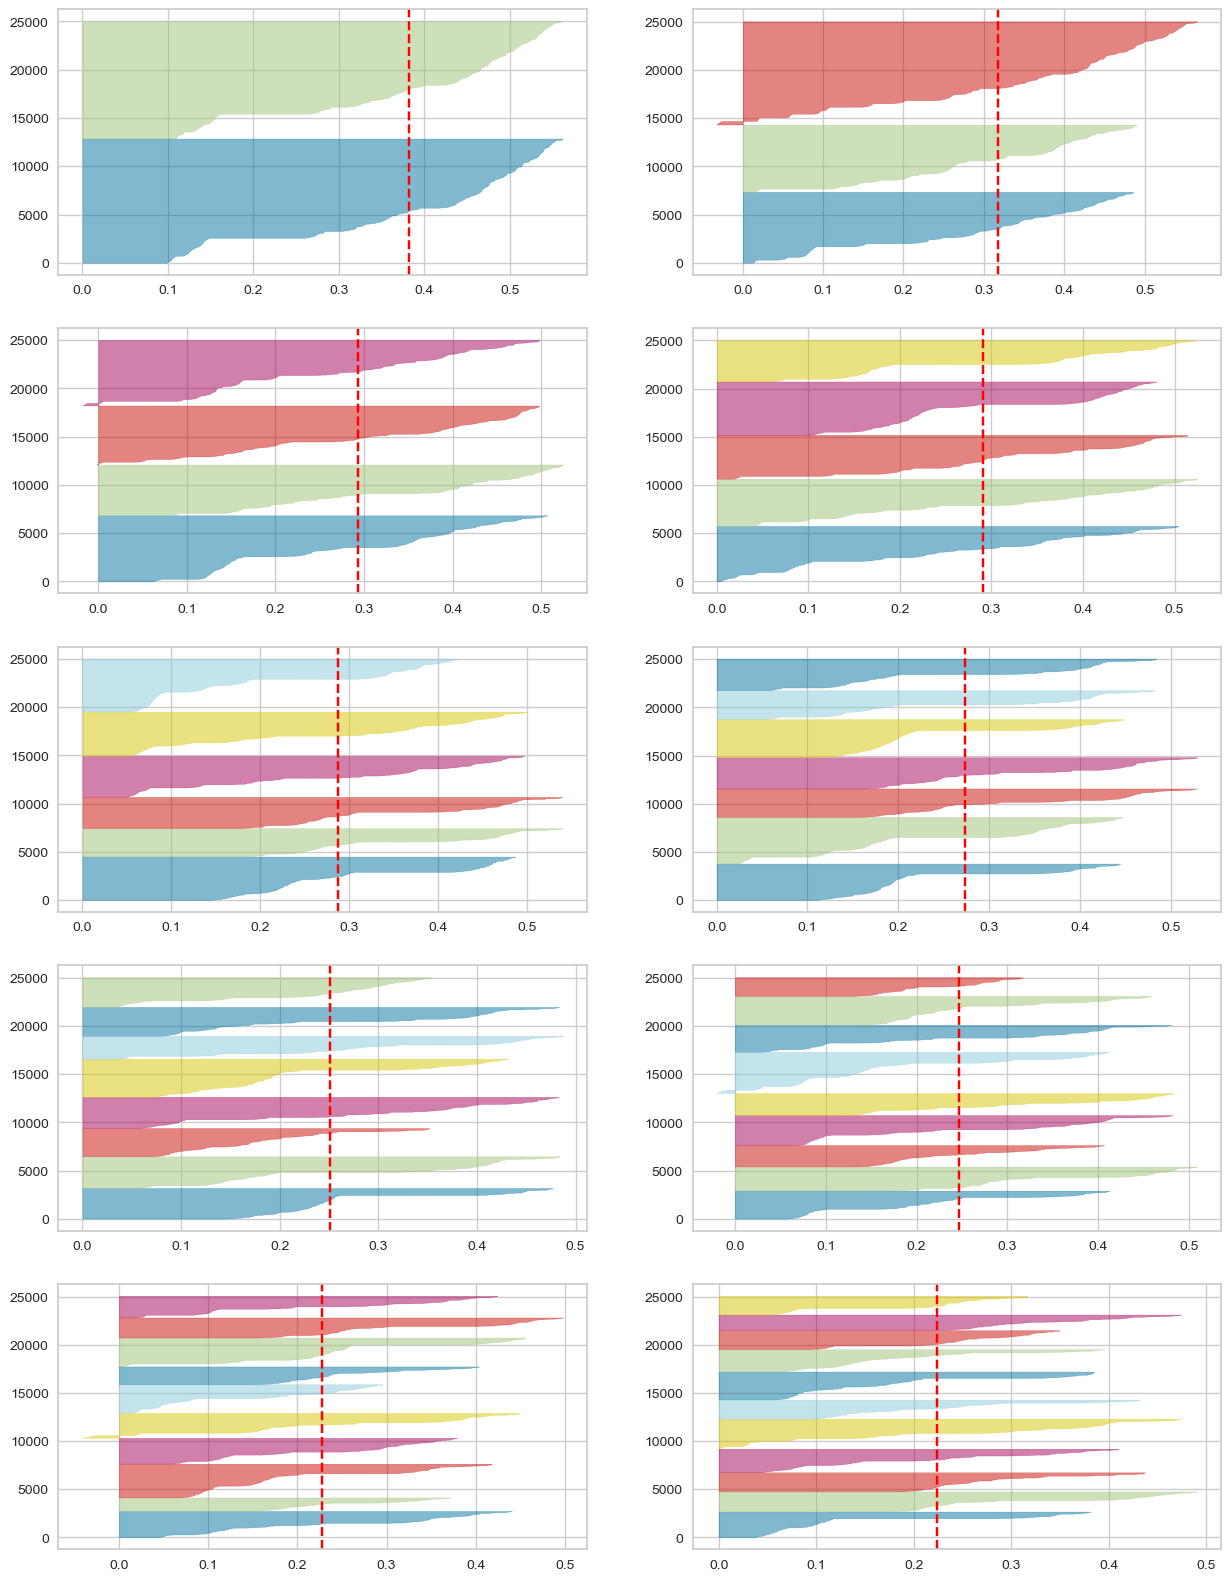

In [ ]:
num_plots = 10
min_i = 2

# data_minimized, labels = load_digits(return_X_y=True)

silhouette_avg = []
# for num_clusters in list(range(2,20)):
#     km = KMeans(n_clusters=num_clusters, init = "k-means++", n_init = 10)
#     km.fit_predict(data_minimized)

fig, ax = plt.subplots(int(num_plots/2), 2, figsize=(15,20))
for i in range(min_i, num_plots+min_i):
    # Create KMeans instances for different number of clusters
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i-2, 2)
    
    # use silhouette score to determine the number of clusters
    labels = km.fit_predict(data_minimized)
    score = silhouette_score(data_minimized, labels)
    silhouette_avg.append(score)
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q][mod])
    visualizer.fit(data_minimized)

plt.plot(np.arange(2,20),silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
_ = plt.xticks(np.arange(2,20))

print (f"Best K: {np.argmax(silhouette_avg)+2}")

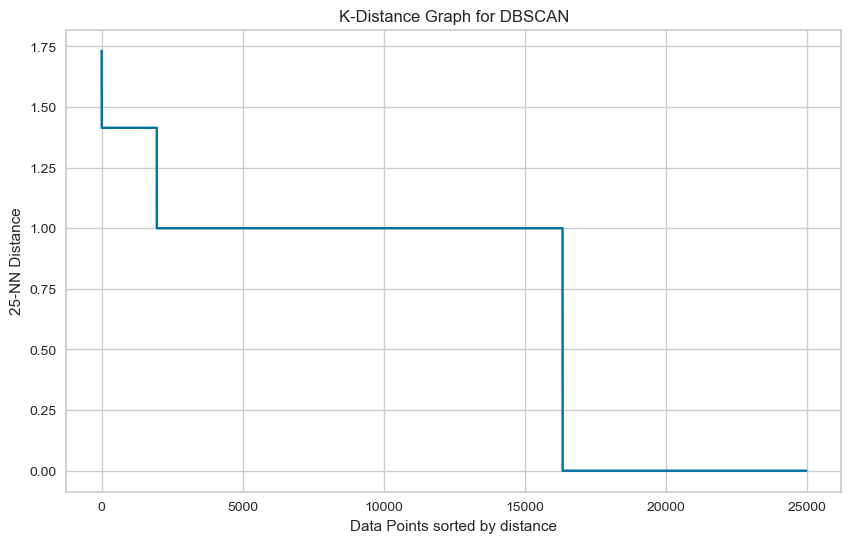

In [ ]:
# Calculate the distance to the k = minPts-1 nearest neighbor
k_distance = distances

# Sort the distances in descending order
k_distance_sorted = np.sort(k_distance)[::-1]

# Plot the k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(k_distance_sorted)
plt.xlabel('Data Points sorted by distance')
plt.ylabel(f'{minPts-1}-NN Distance')
plt.title('K-Distance Graph for DBSCAN')
# plt.ylim(0.0, 100000)
# plt.xlim(0, 10)
plt.show()

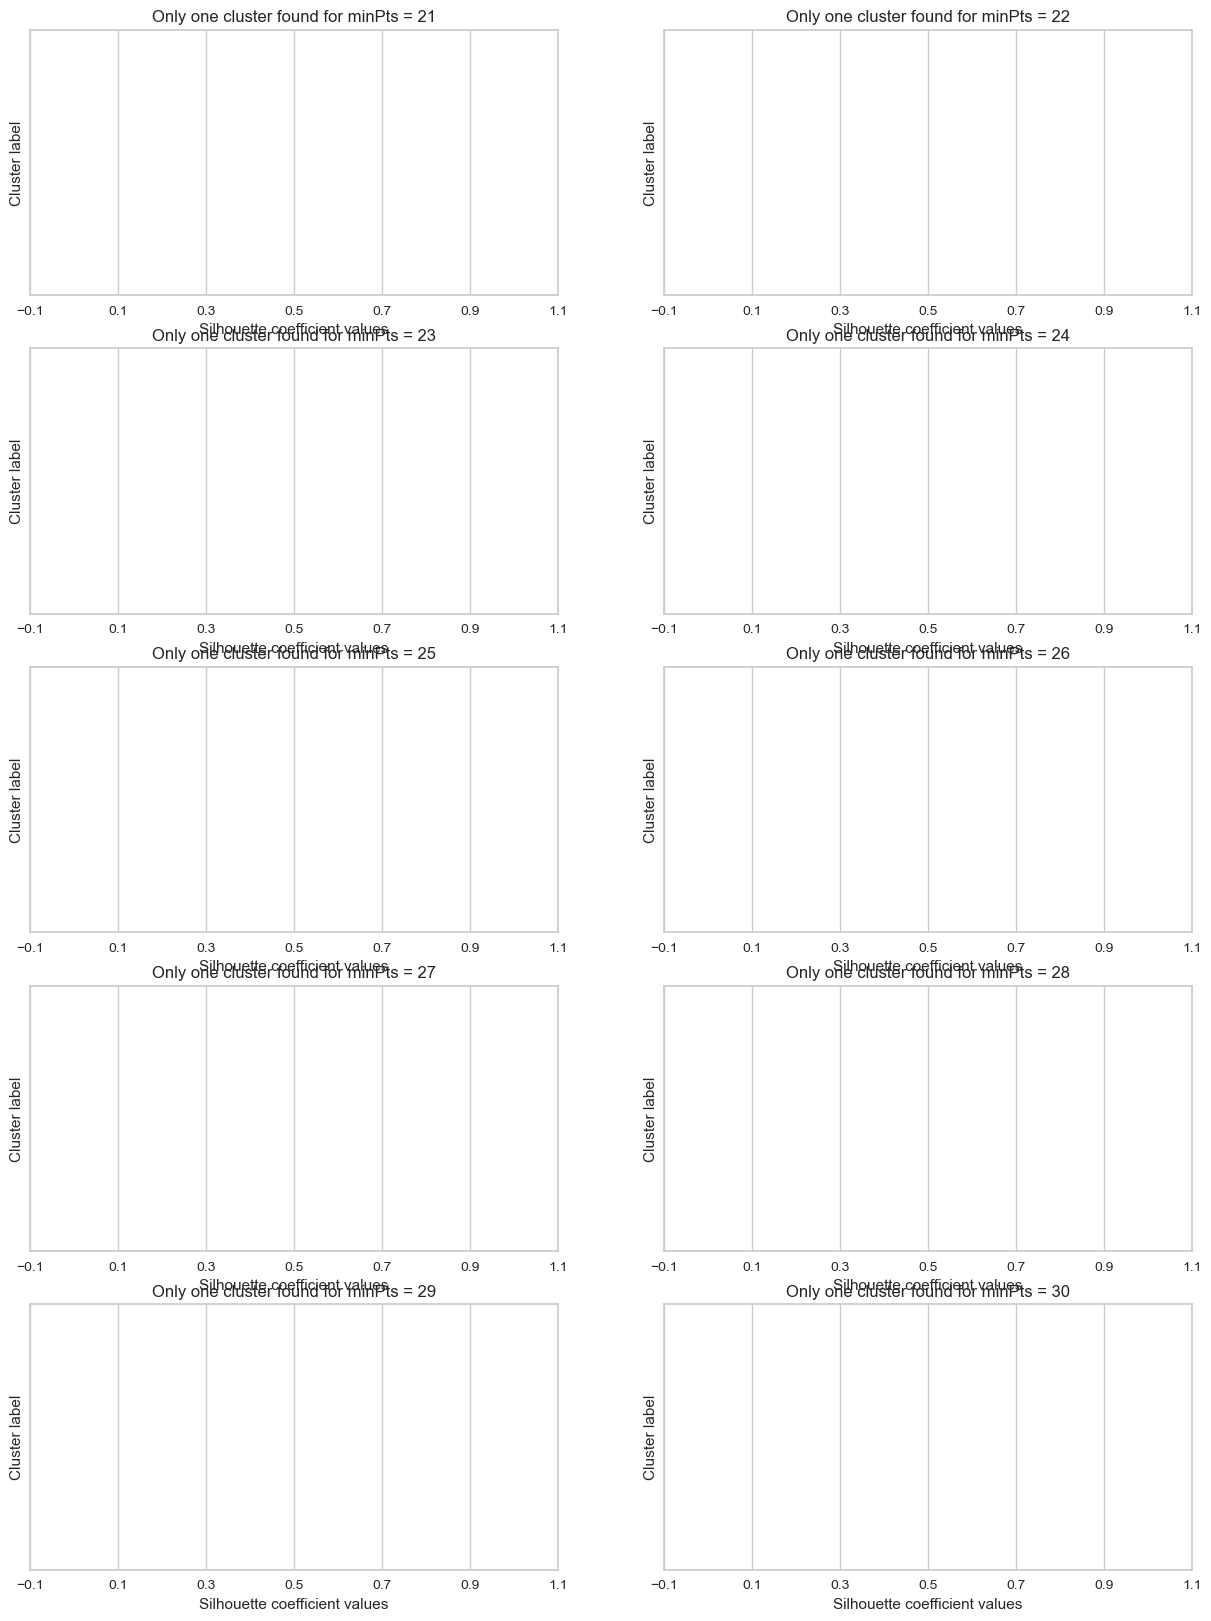

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

# implement DBSCAN

num_plots = 10
min_i = int((2 * data_minimized.shape[1]) - (num_plots / 2))

eps = 24980

fig, ax = plt.subplots(int(num_plots/2), 2, figsize=(15,20))
for idx, minPts in enumerate(range(min_i, num_plots + min_i)):
    dbscan = DBSCAN(eps=eps, min_samples=minPts)
    
    labels = dbscan.fit_predict(data_minimized)
    if len(set(labels)) > 1:
        silhouette_avg = silhouette_score(data_minimized, labels)
        sample_silhouette_values = silhouette_samples(data_minimized, labels)
        
        y_lower = 10
        for i in range(len(set(labels)) - (1 if -1 in labels else 0)):
            ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
            ith_cluster_silhouette_values.sort()
            
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = plt.cm.nipy_spectral(float(i) / len(set(labels)))
            ax[idx // 2, idx % 2].fill_betweenx(np.arange(y_lower, y_upper),
                                                0, ith_cluster_silhouette_values,
                                                facecolor=color, edgecolor=color, alpha=0.7)
            
            ax[idx // 2, idx % 2].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
        
        ax[idx // 2, idx % 2].set_title(f"Silhouette plot for minPts = {minPts}")
        ax[idx // 2, idx % 2].set_xlabel("Silhouette coefficient values")
        ax[idx // 2, idx % 2].set_ylabel("Cluster label")
        
        ax[idx // 2, idx % 2].axvline(x=silhouette_avg, color="red", linestyle="--")
        ax[idx // 2, idx % 2].set_yticks([])
        ax[idx // 2, idx % 2].set_xticks(np.arange(-0.1, 1.1, 0.2))
    else:
        ax[idx // 2, idx % 2].set_title(f"Only one cluster found for minPts = {minPts}")
        ax[idx // 2, idx % 2].set_xlabel("Silhouette coefficient values")
        ax[idx // 2, idx % 2].set_ylabel("Cluster label")
        ax[idx // 2, idx % 2].set_yticks([])
        ax[idx // 2, idx % 2].set_xticks(np.arange(-0.1, 1.1, 0.2))